In [1]:
import ee
from drought.data import pipeline
from drought.visualization import plot
import geemap
import matplotlib.pyplot as plt
import pandas as pd

### Get GEDI + Climate data as monthly means per polygon

In [2]:
monthly_data = pipeline.get_monthly_means_per_polygon()

### Plot climate vs. PAI

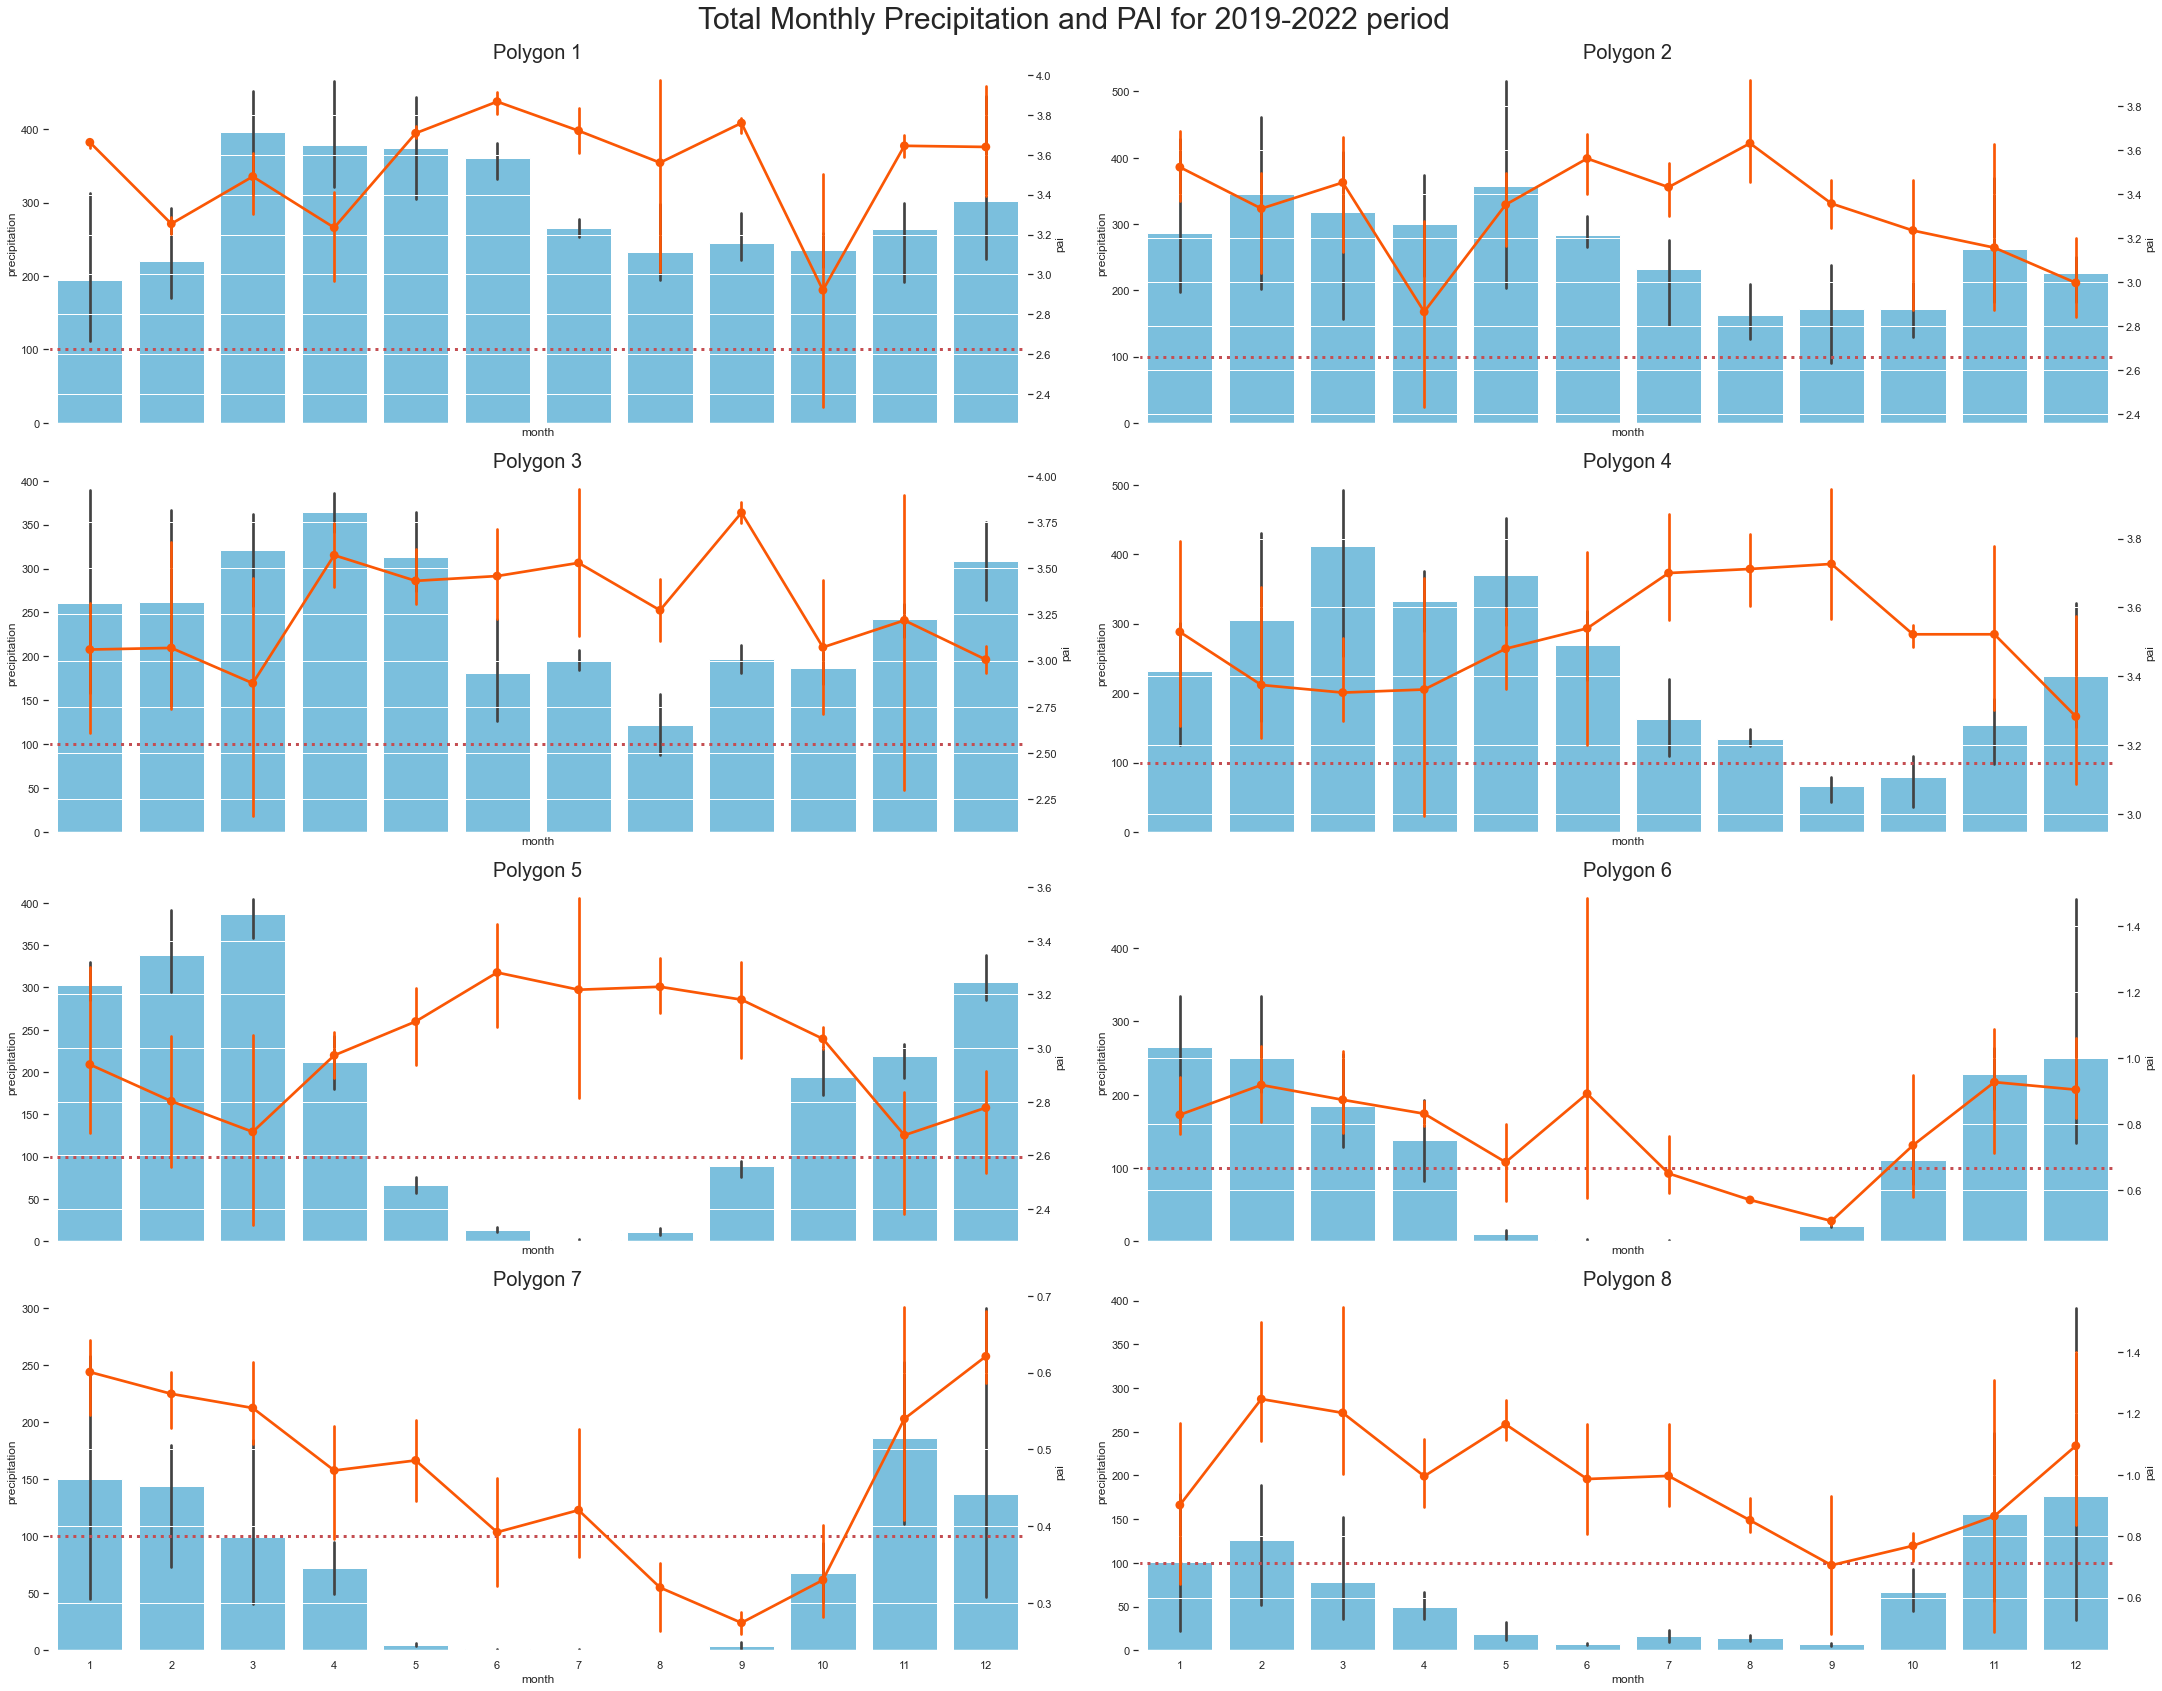

In [3]:
fig, ax = plot.layered_plot_per_polygon(monthly_data, 
                                        x='month',
                                        bar_y='precipitation',
                                        line_y='pai',
                                        title="Total Monthly Precipitation and PAI for 2019-2022 period")
                                        
# Draw a horizontal line at 100mm precipitation, that signifies a dry month.
[subplot.axhline(y=100, color = 'r', linestyle = 'dotted', linewidth=3) 
 for subplot in fig.get_axes() if subplot in ax]

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_with_error_bars_precipitation_pai_2019_to_2022.png')

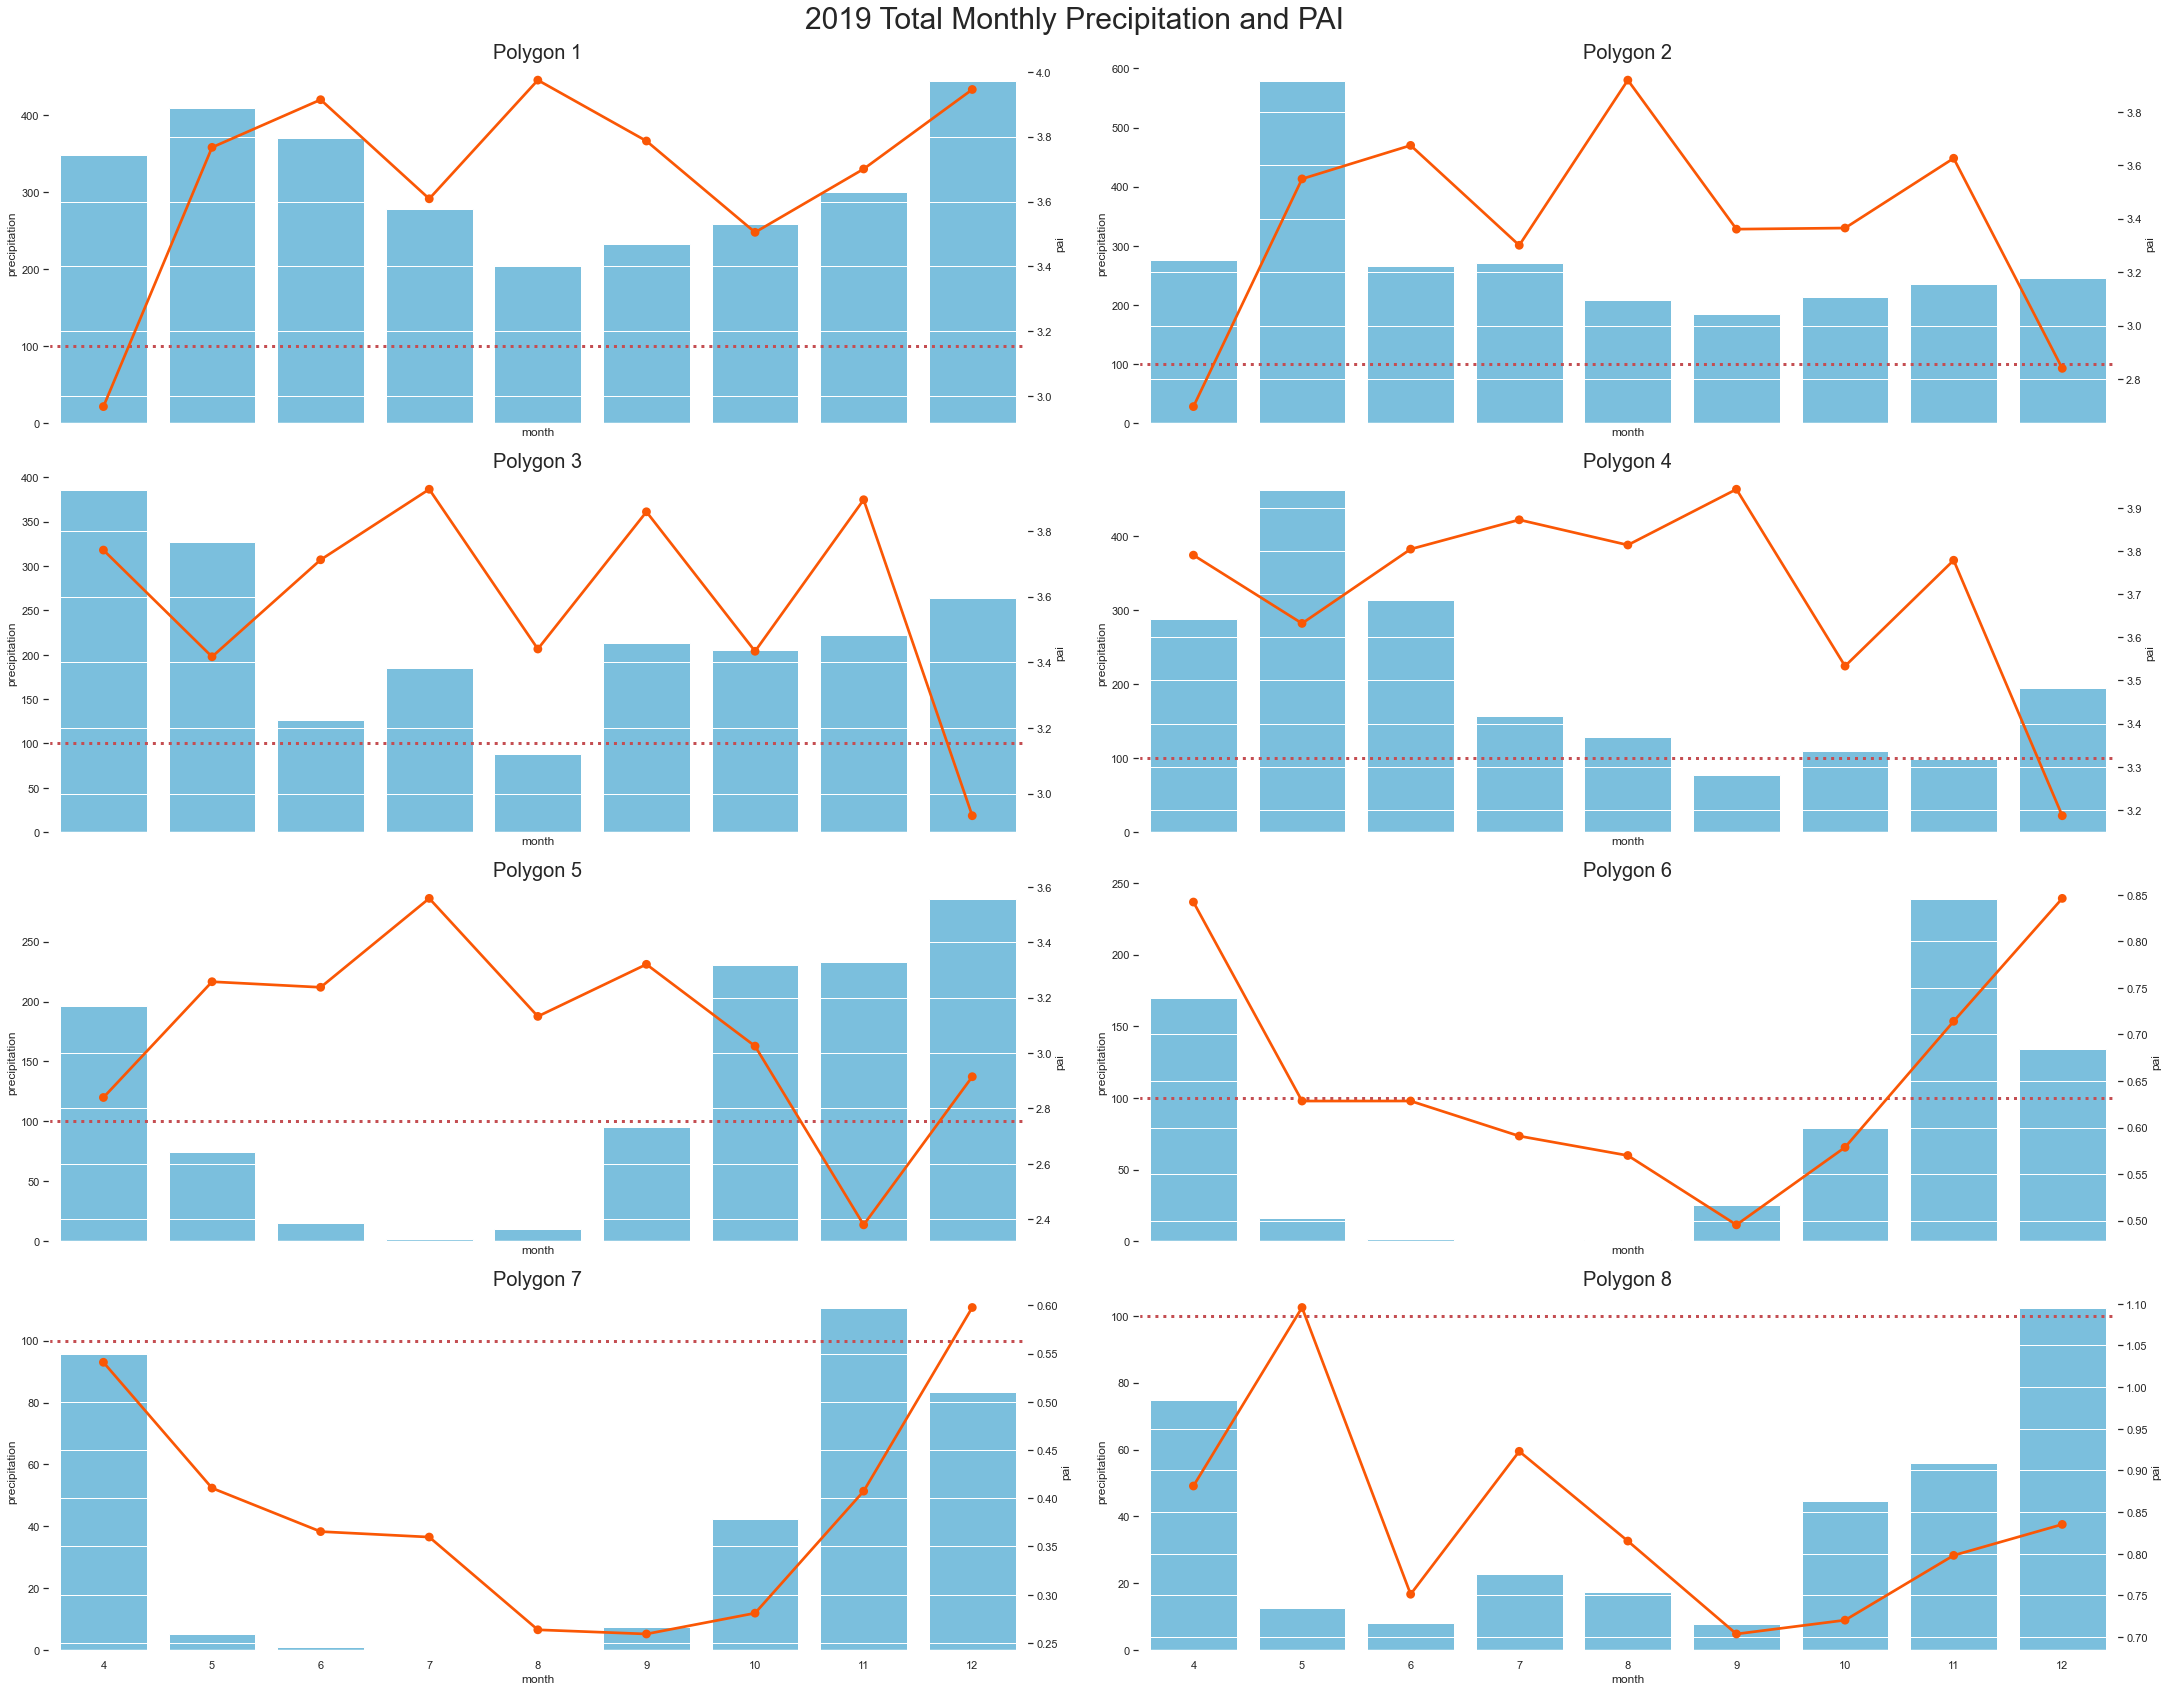

In [4]:
fig, ax = plot.layered_plot_per_polygon(monthly_data[monthly_data.year == 2019], 
                                        x='month',
                                        bar_y='precipitation',
                                        line_y='pai',
                                        title="2019 Total Monthly Precipitation and PAI")

# Draw a horizontal line at 100mm precipitation, that signifies a dry month.
[subplot.axhline(y=100, color = 'r', linestyle = 'dotted', linewidth=3) 
 for subplot in fig.get_axes() if subplot in ax]

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_mean_precipitation_pai_2019.png')

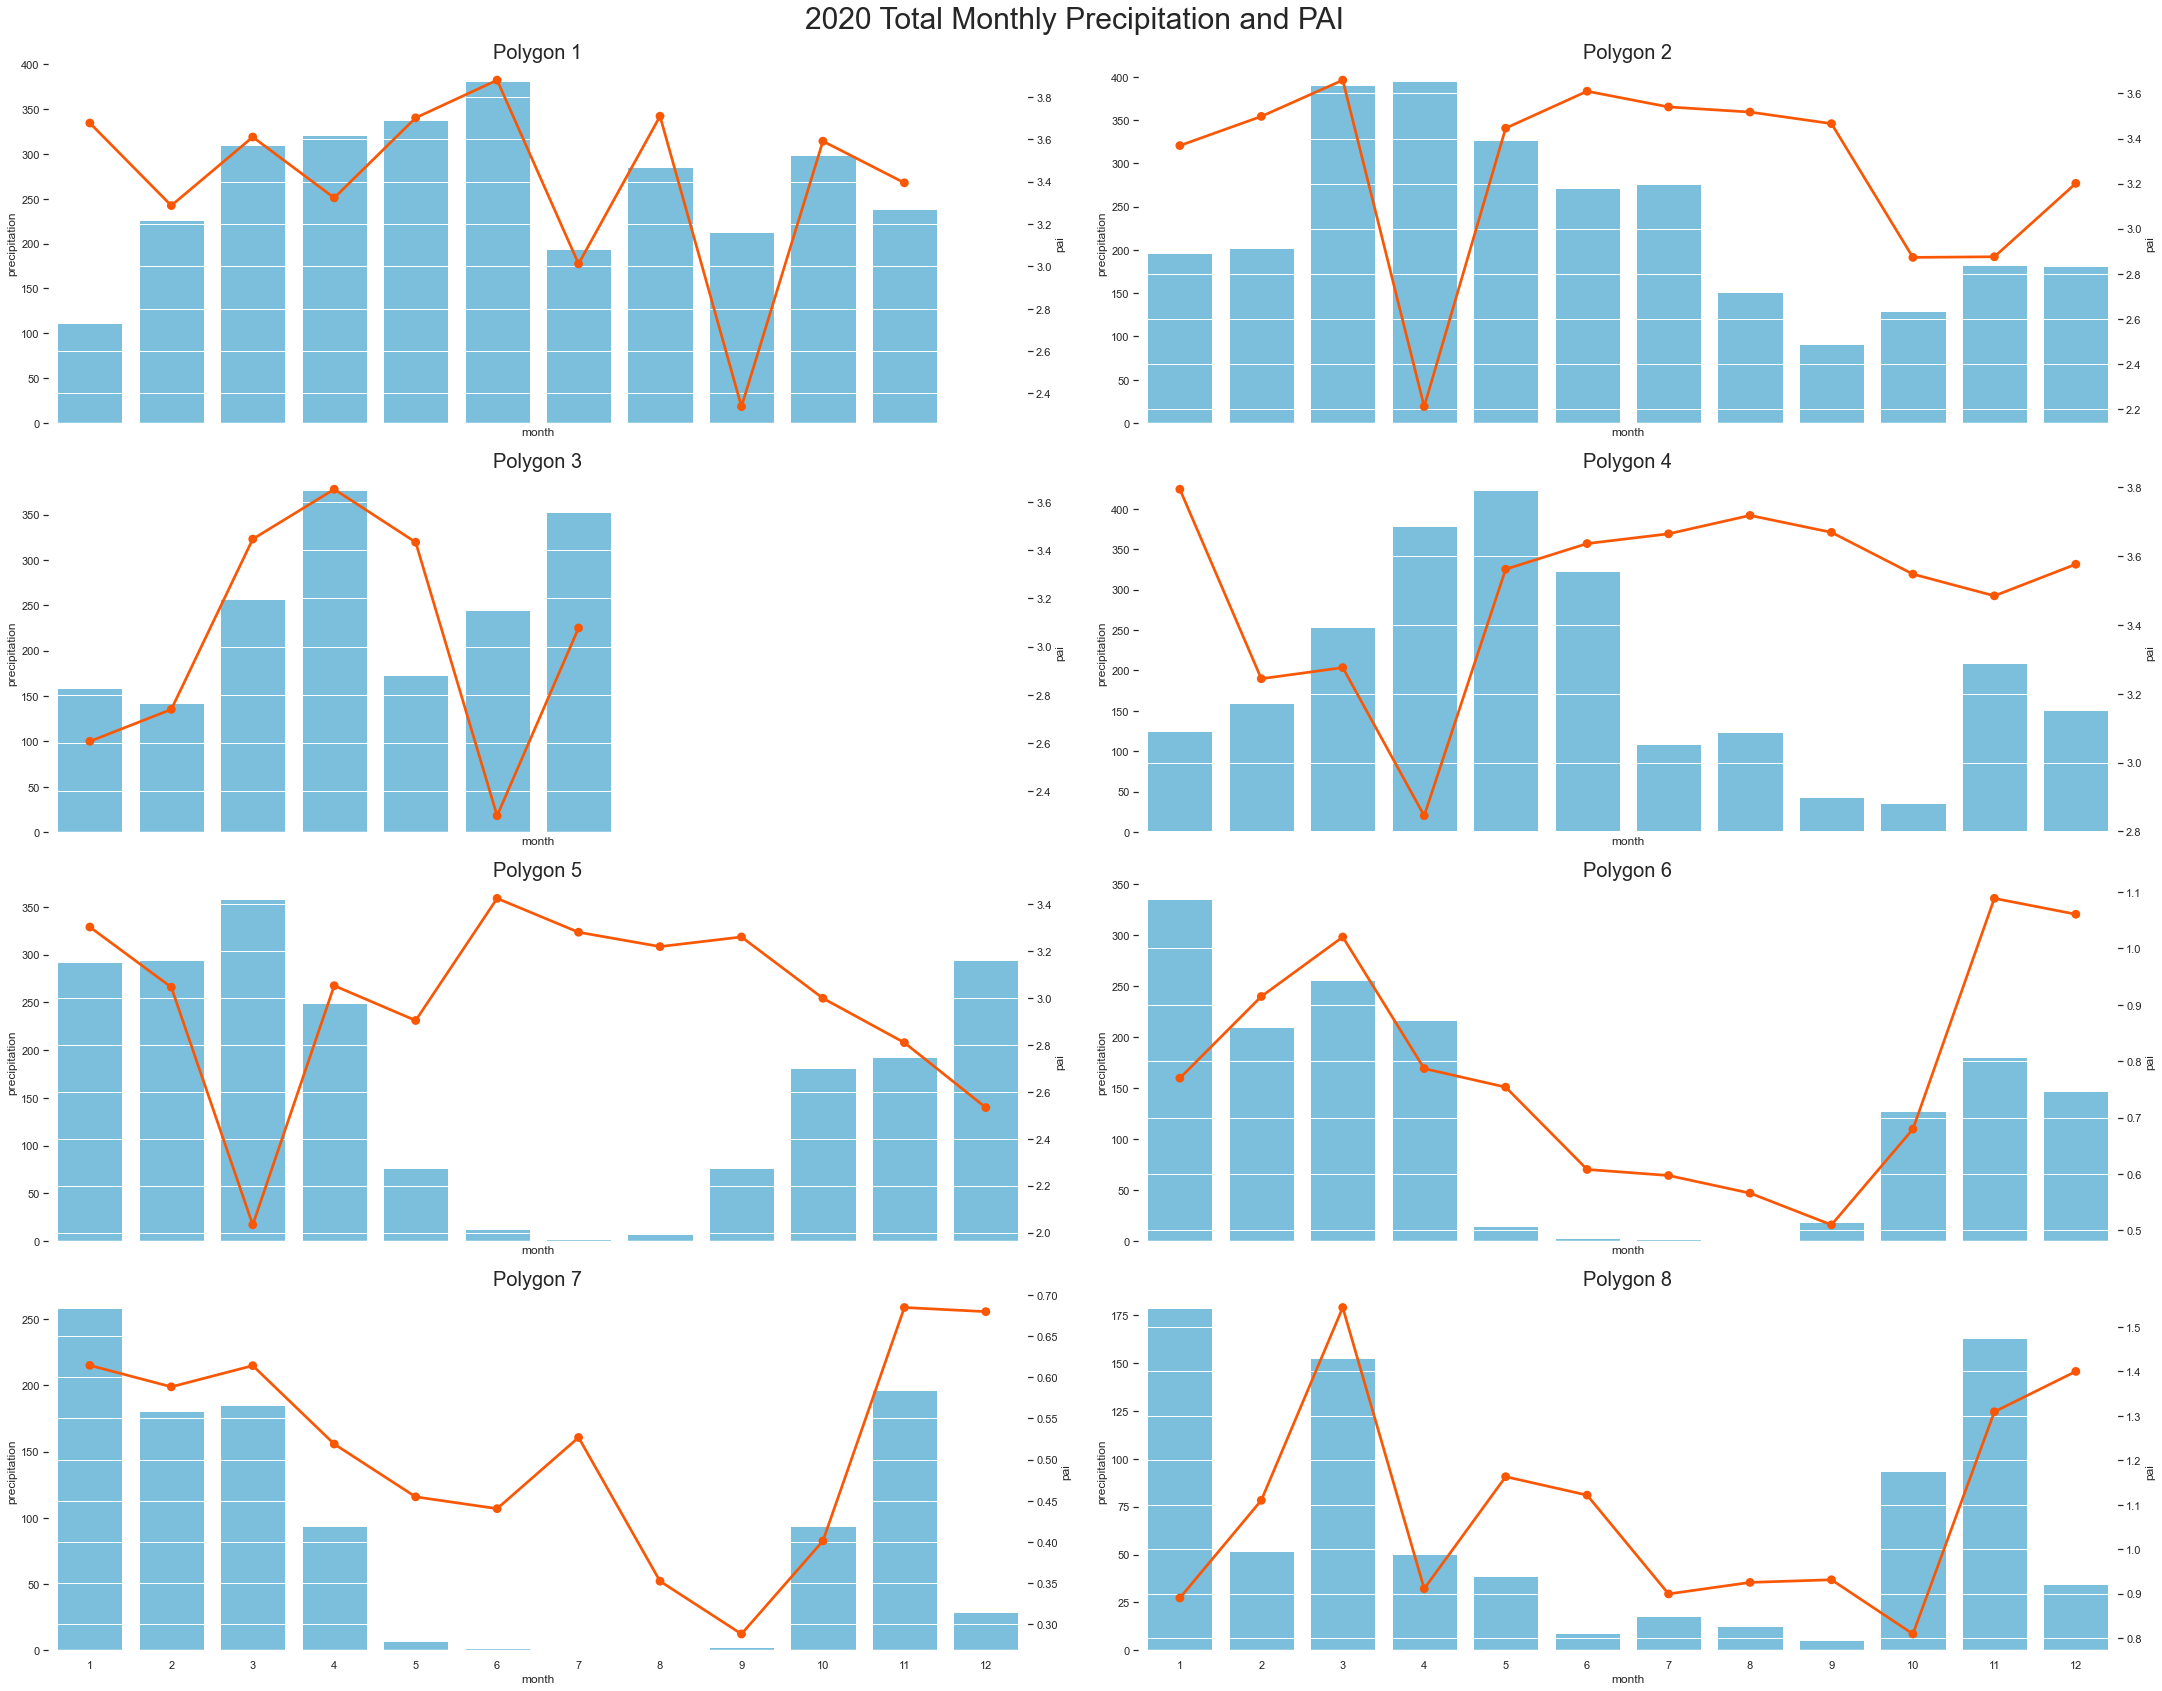

In [5]:
plot.layered_plot_per_polygon(monthly_data[monthly_data.year == 2020], 
                              x='month',
                              bar_y='precipitation',
                              line_y='pai',
                              title="2020 Total Monthly Precipitation and PAI")

# Draw a horizontal line at 100mm precipitation, that signifies a dry month.
[subplot.axhline(y=100, color = 'r', linestyle = 'dotted', linewidth=3) 
 for subplot in fig.get_axes() if subplot in ax]

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_mean_precipitation_pai_2020.png')

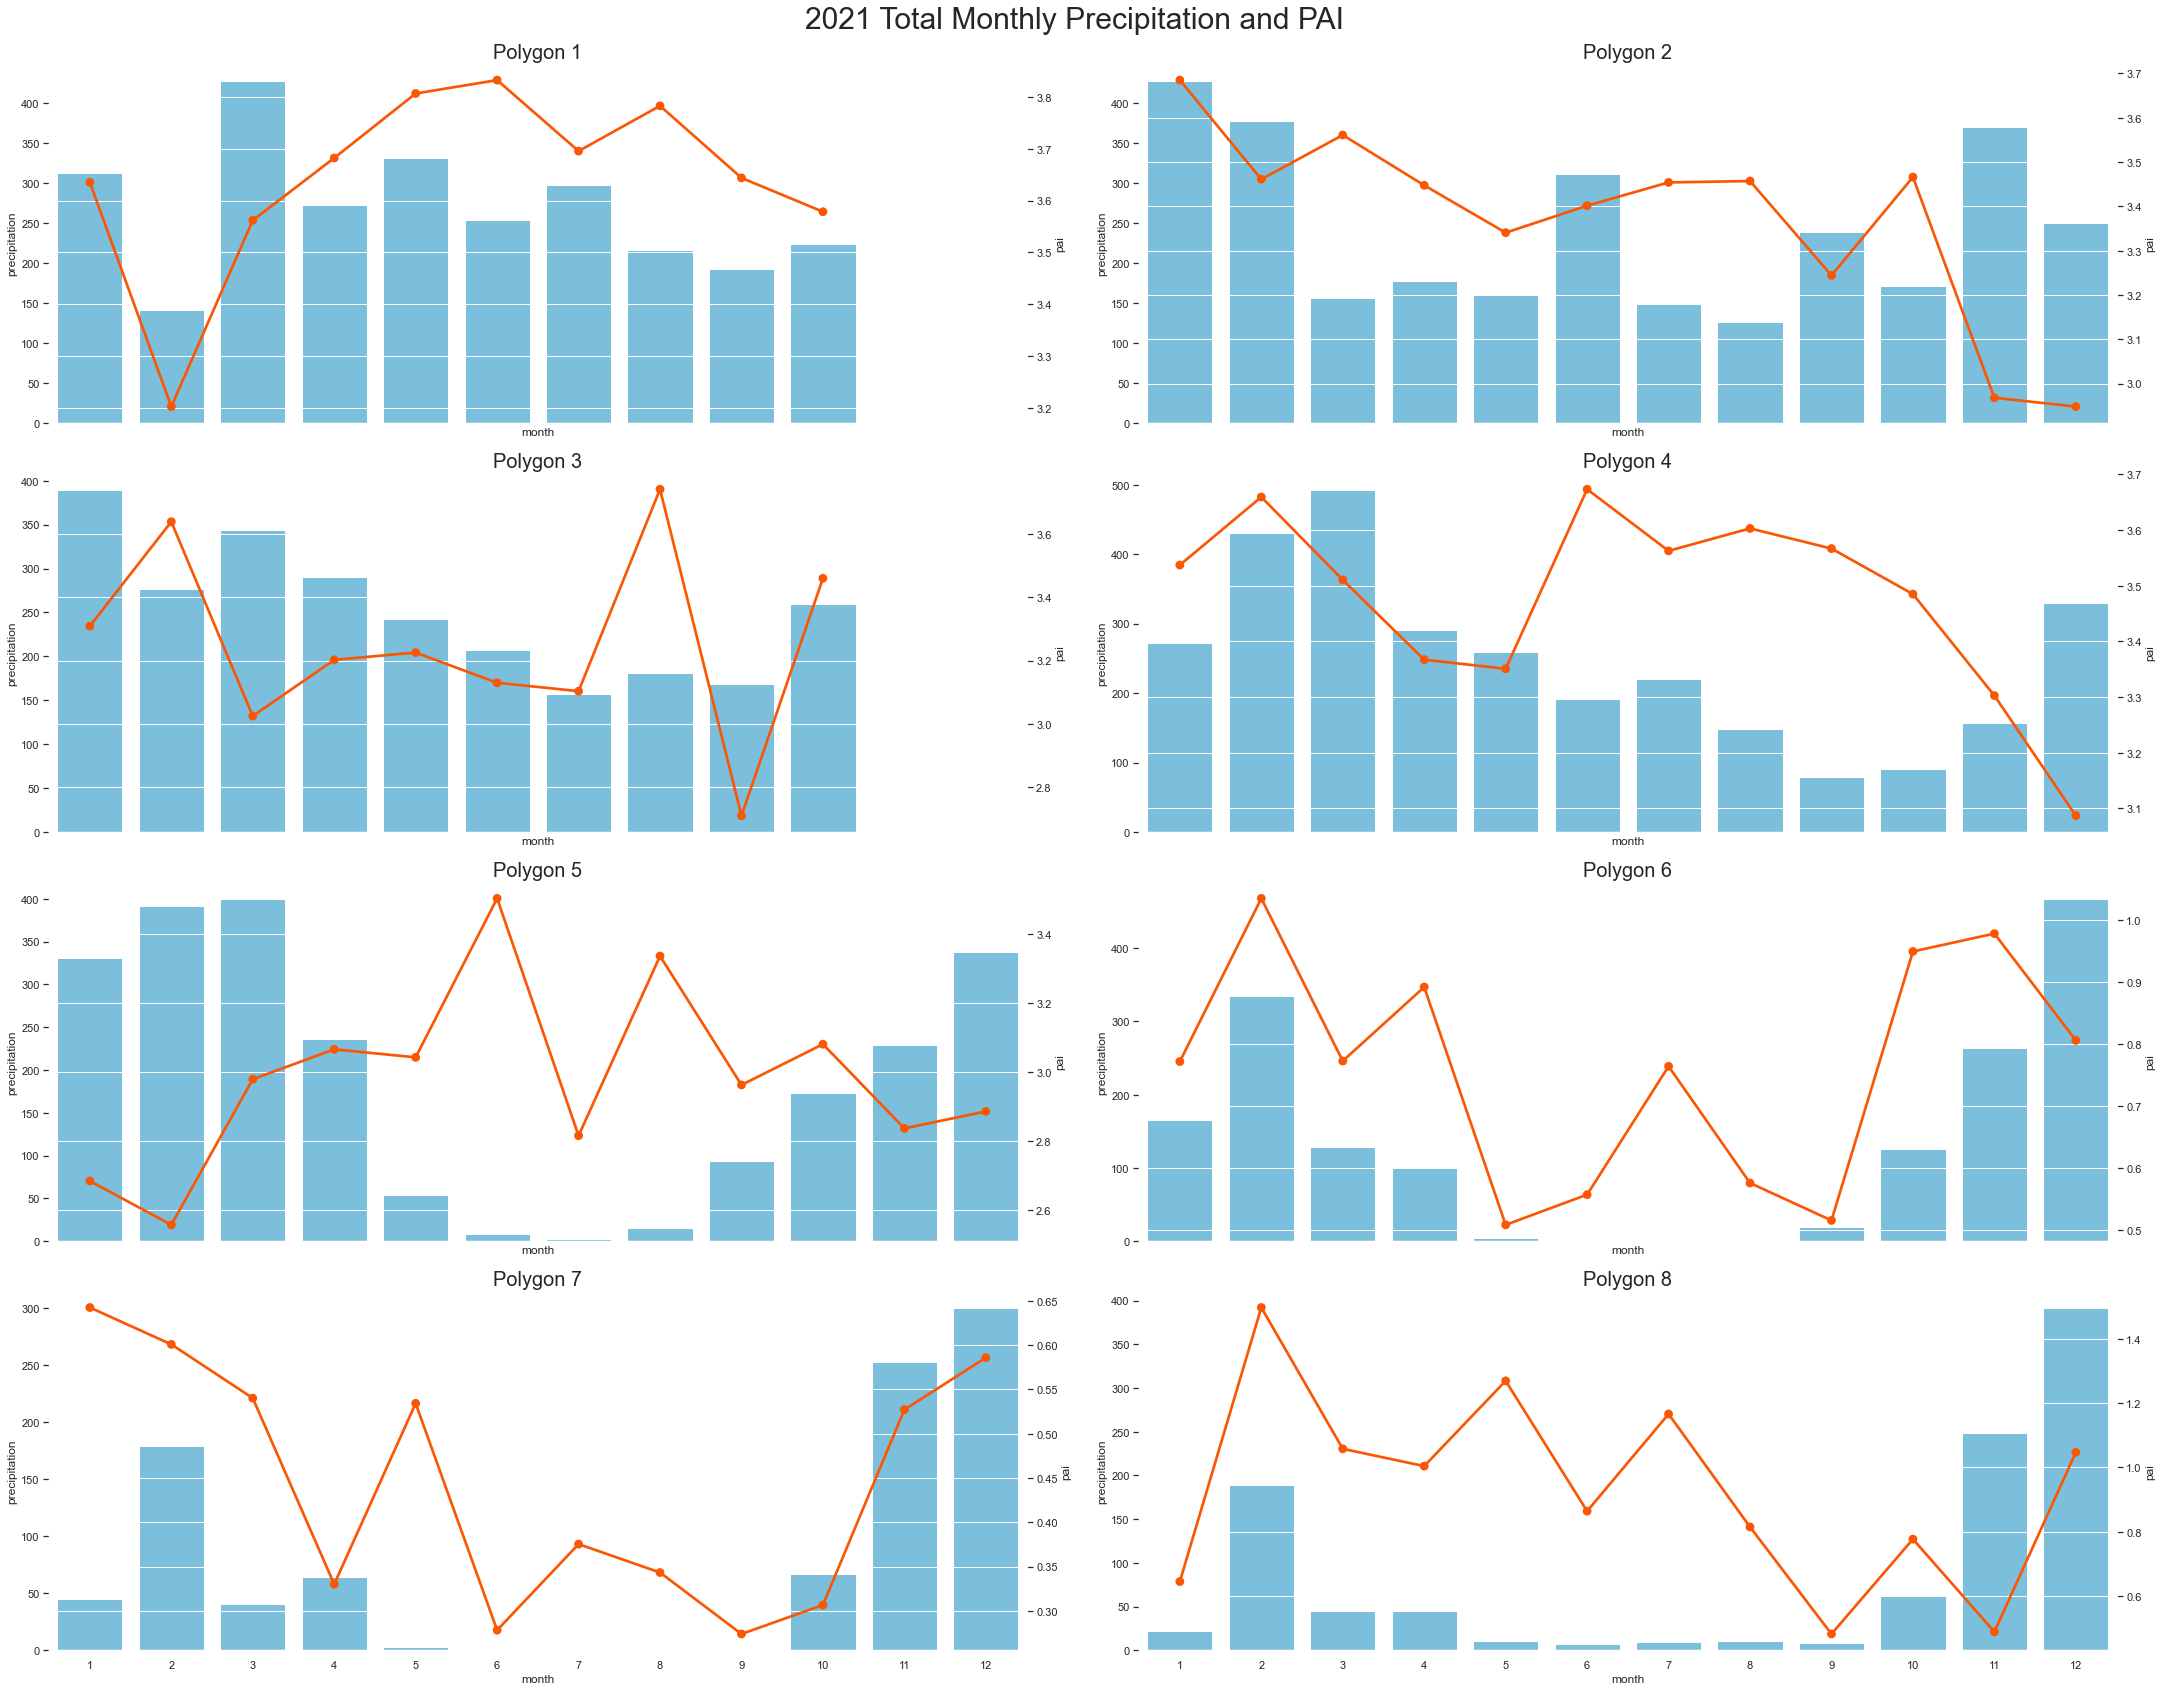

In [6]:
plot.layered_plot_per_polygon(monthly_data[monthly_data.year == 2021], 
                              x='month',
                              bar_y='precipitation',
                              line_y='pai',
                              title="2021 Total Monthly Precipitation and PAI")

# Draw a horizontal line at 100mm precipitation, that signifies a dry month.
[subplot.axhline(y=100, color = 'r', linestyle = 'dotted', linewidth=3) 
 for subplot in fig.get_axes() if subplot in ax]

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_mean_precipitation_pai_2021.png')

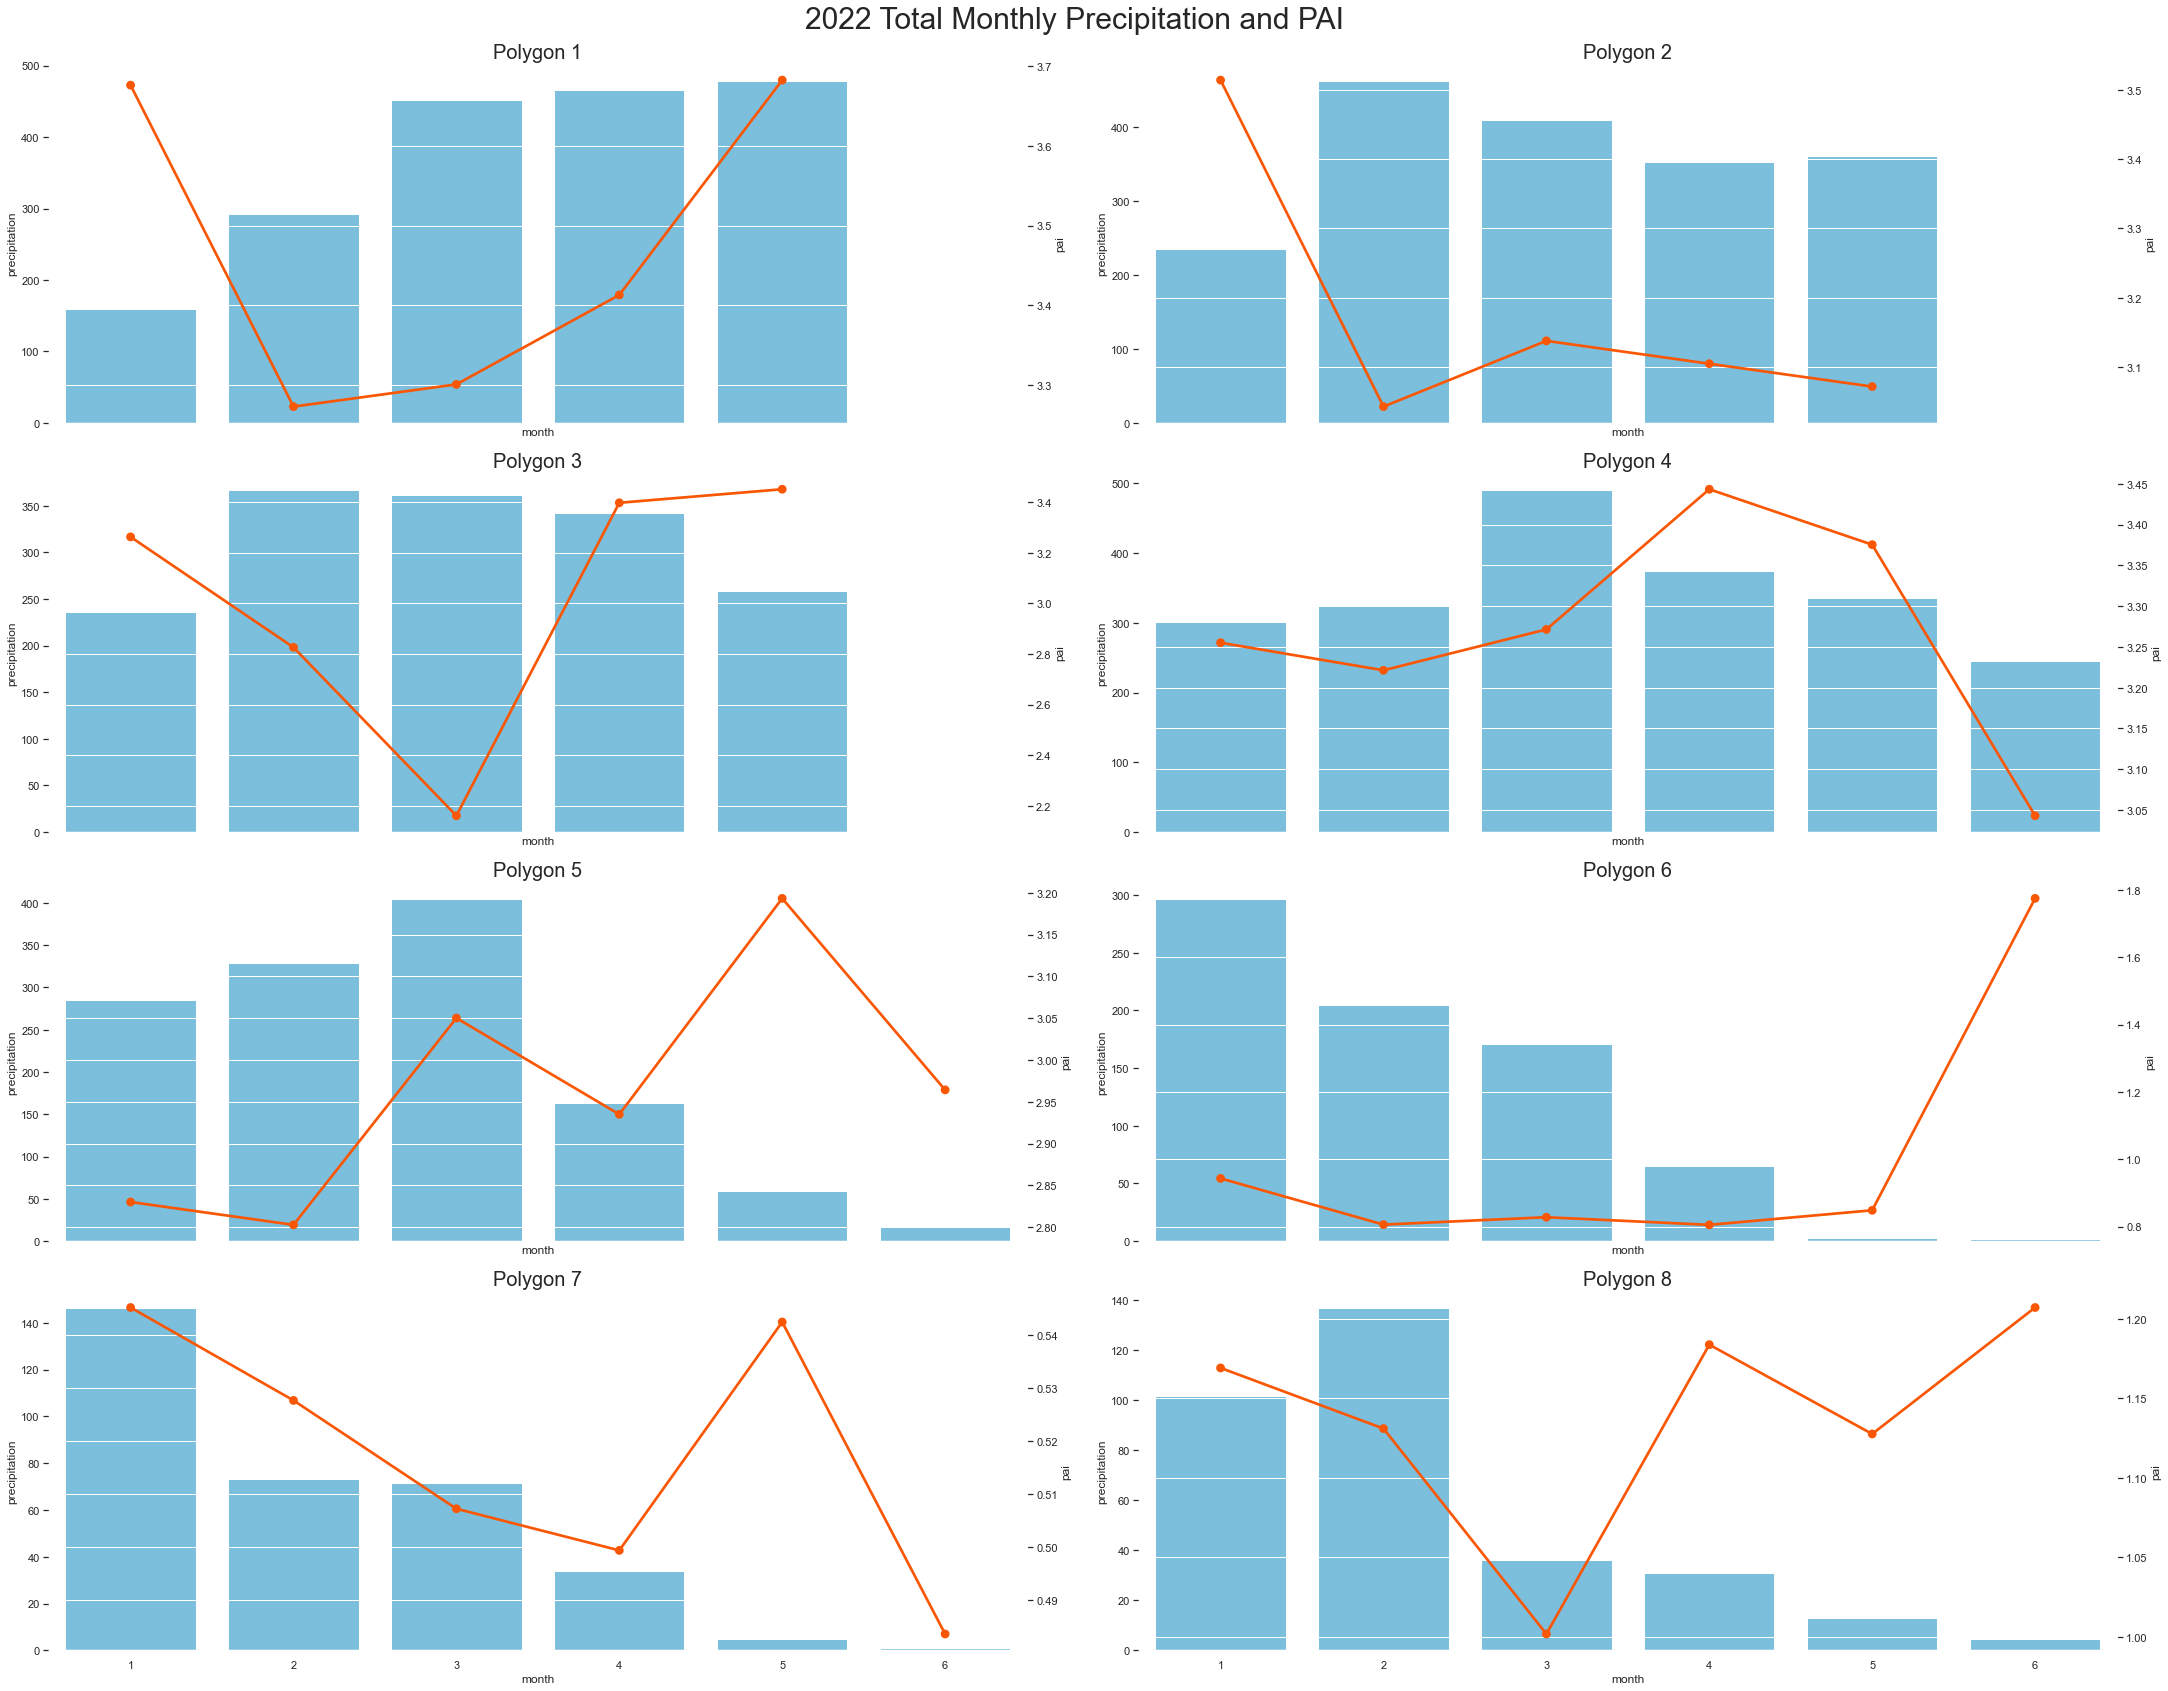

In [7]:
plot.layered_plot_per_polygon(monthly_data[monthly_data.year == 2022], 
                              x='month',
                              bar_y='precipitation',
                              line_y='pai',
                              title="2022 Total Monthly Precipitation and PAI")

# Draw a horizontal line at 100mm precipitation, that signifies a dry month.
[subplot.axhline(y=100, color = 'r', linestyle = 'dotted', linewidth=3) 
 for subplot in fig.get_axes() if subplot in ax]

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_mean_precipitation_pai_2022.png')

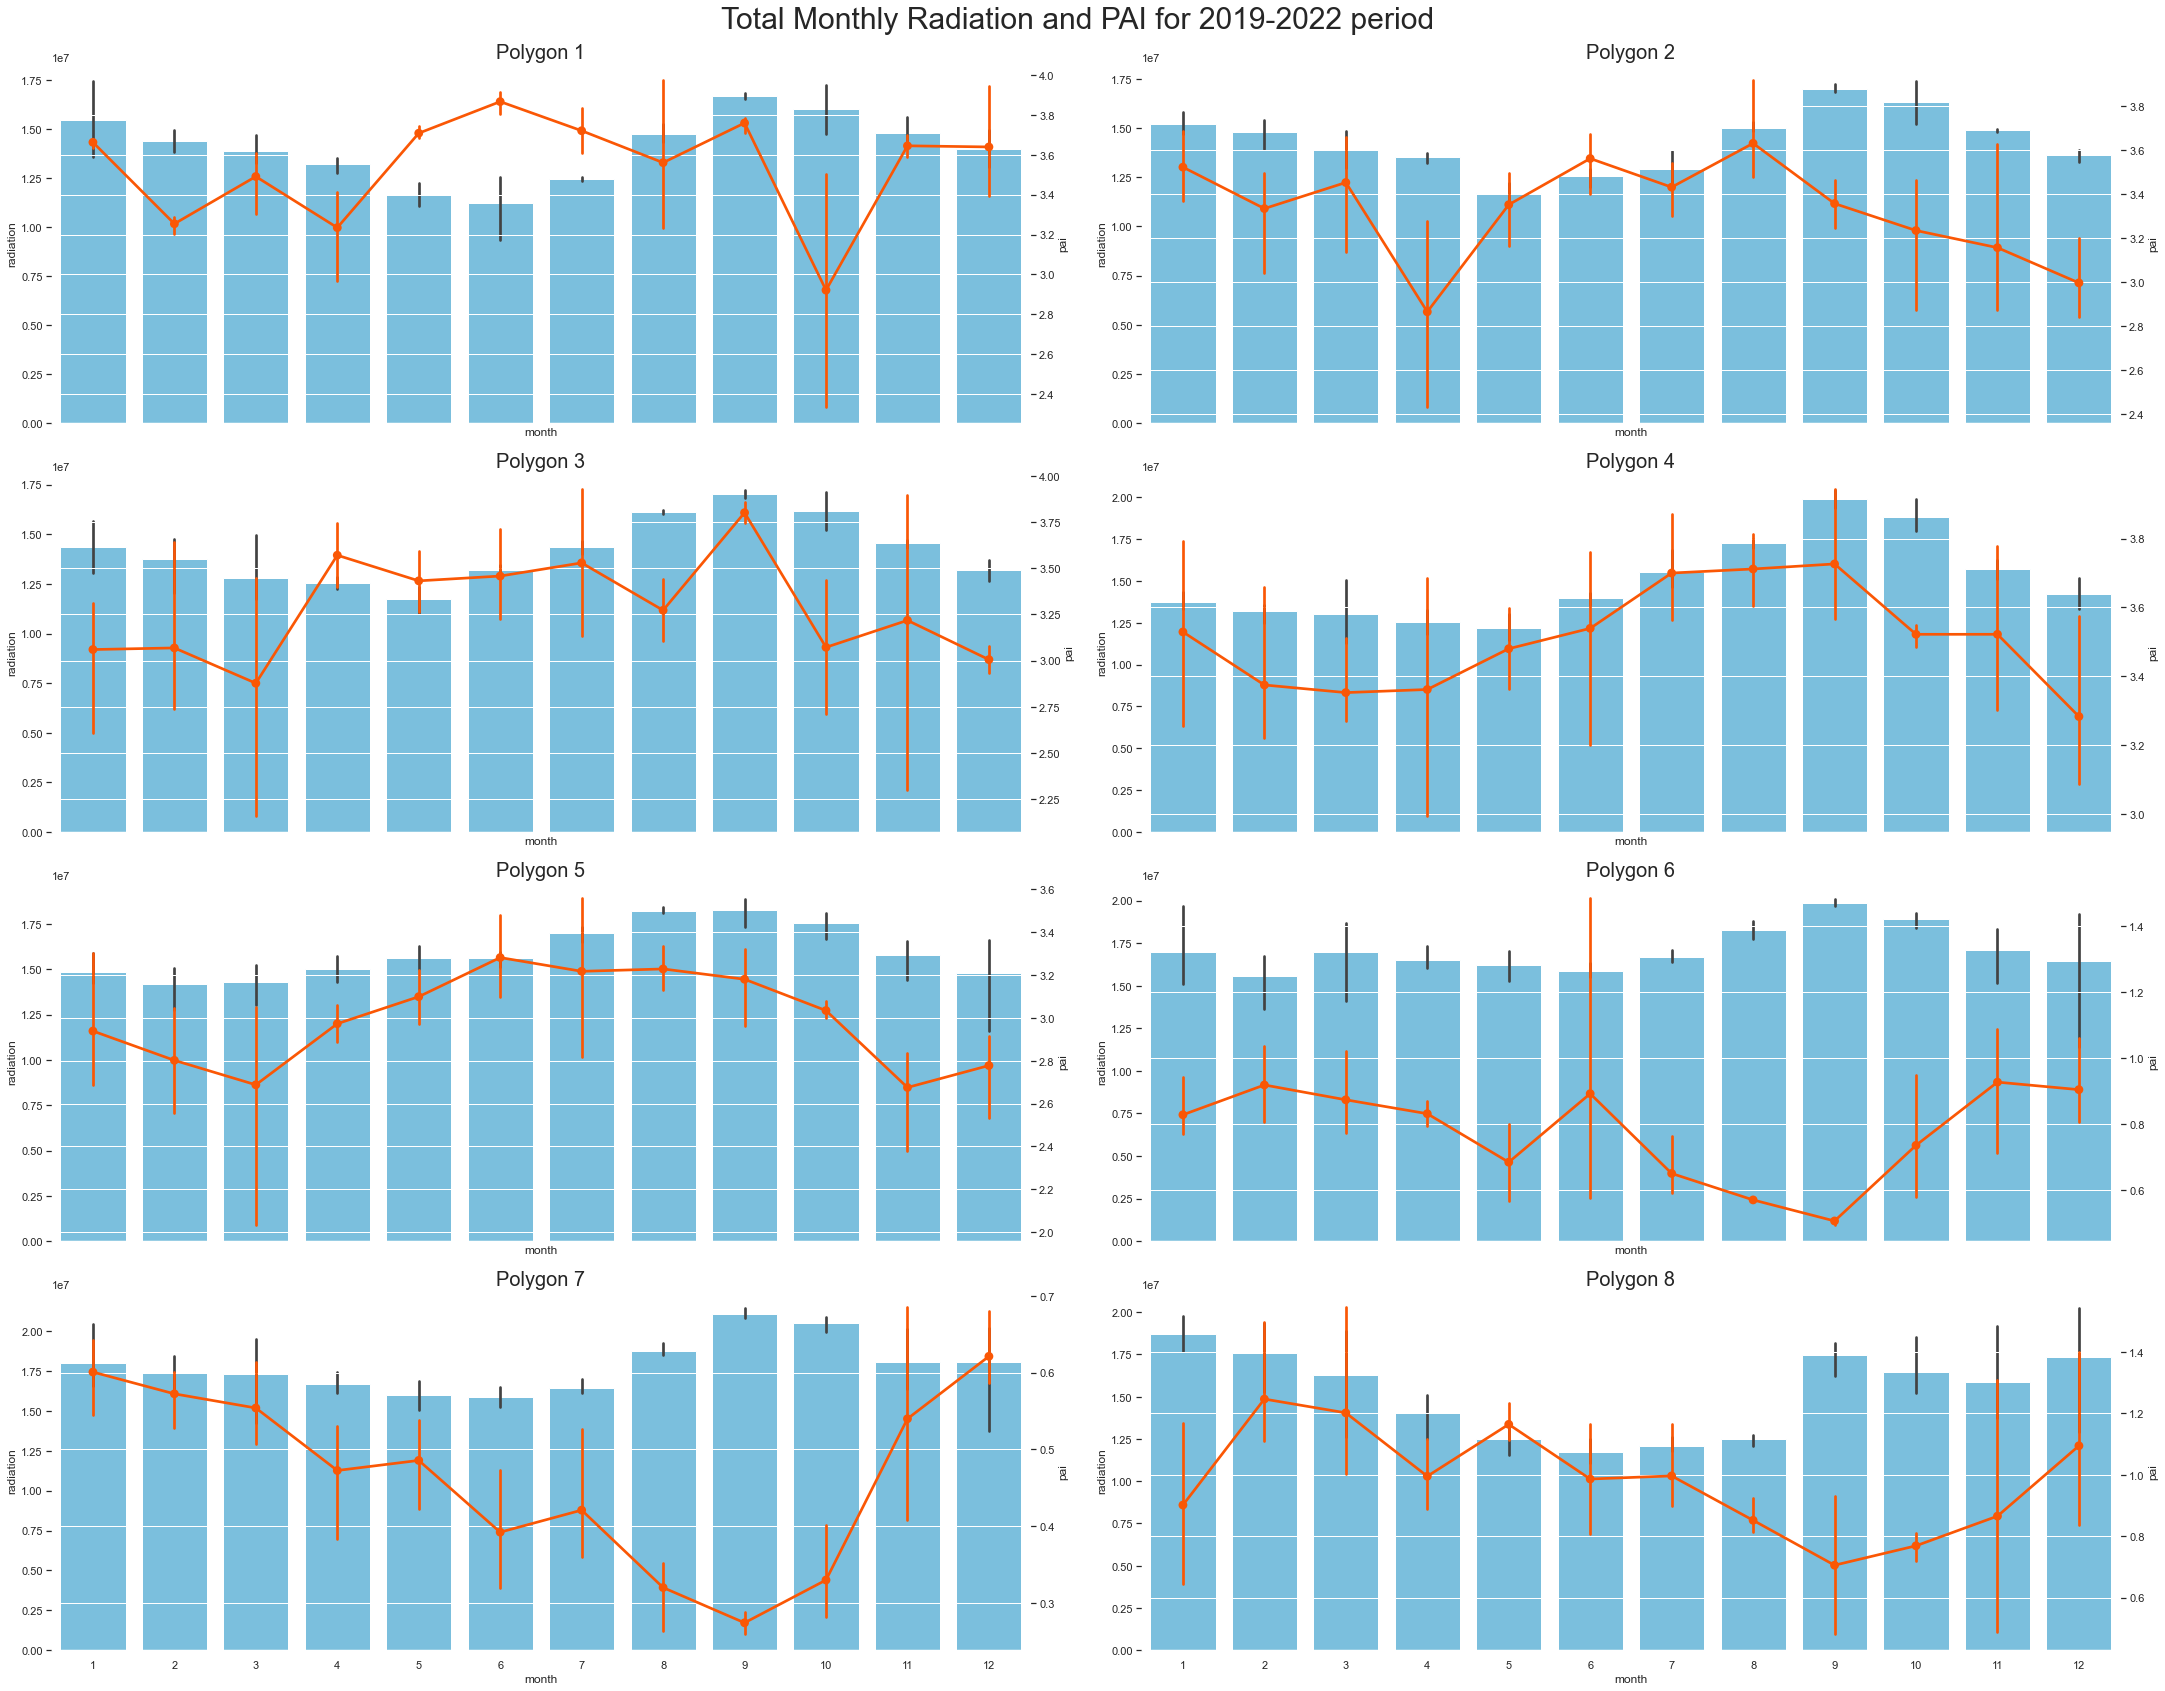

In [8]:
plot.layered_plot_per_polygon(monthly_data, 
                              x='month',
                              bar_y='radiation',
                              line_y='pai',
                              title="Total Monthly Radiation and PAI for 2019-2022 period")

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_with_error_bars_radiation_pai_2019_to_2022.png')

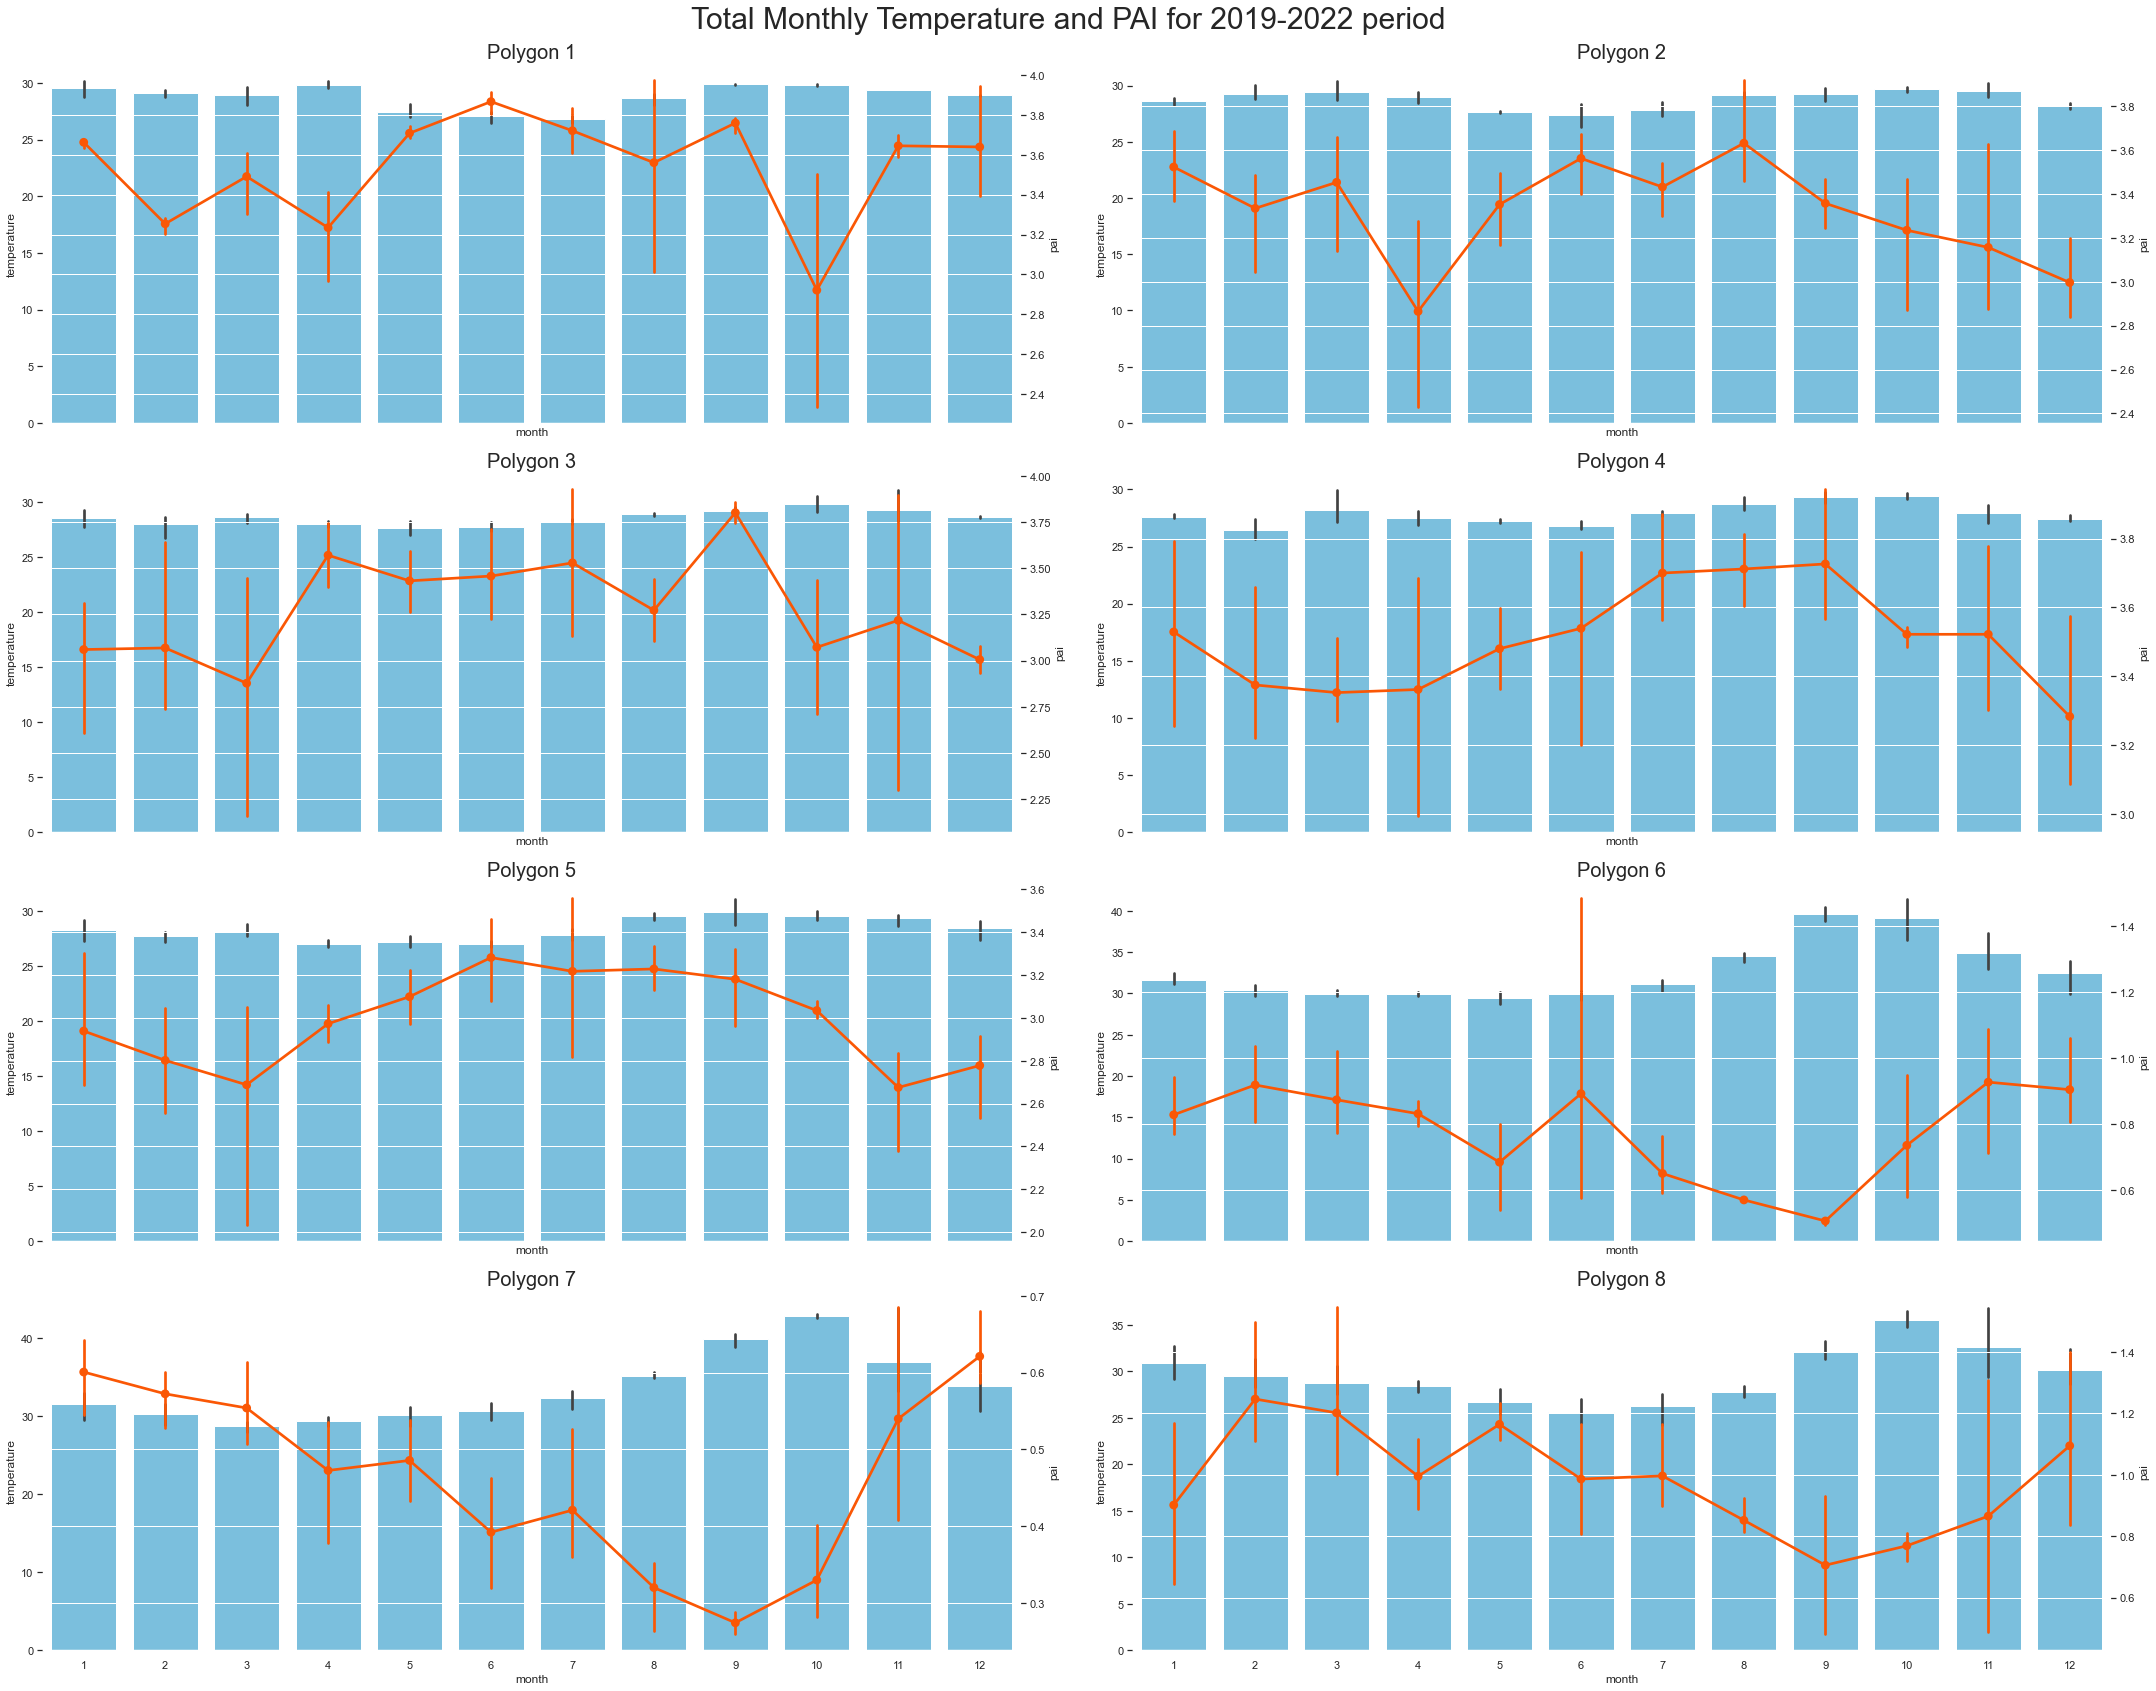

In [9]:
plot.layered_plot_per_polygon(monthly_data, 
                              x='month',
                              bar_y='temperature',
                              line_y='pai',
                              title="Total Monthly Temperature and PAI for 2019-2022 period")

plt.savefig(f'../../reports/figures/exploratory/layered_monthly_with_error_bars_temperature_pai_2019_to_2022.png')